See https://github.com/fabian-kutschera/MAthesis/blob/main/SeisSol/seissolxdmf_Samos.ipynb

In [1]:
# download from https://pypi.org/project/seissolxdmf/
import seissolxdmf 

import pyproj

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib

import numpy as np

from cmcrameri import cm

from mpl_toolkits.basemap import Basemap, maskoceans
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from netCDF4 import Dataset

import pandas as pd

In [2]:
plt.rcParams["font.family"] = "sans-serif"
ps = 18
plt.rcParams.update({"font.size": ps})
plt.rcParams["font.family"] = "sans"
matplotlib.rc("xtick", labelsize=ps)
matplotlib.rc("ytick", labelsize=ps)

In [3]:
transformer = pyproj.Transformer.from_crs("+proj=tmerc +datum=WGS84 +k=0.9996 +lon_0=26.25 +lat_0=37.75", "epsg:4326", always_xy=True)

In [29]:
def plot_ssha(xdmfFilename,timestep):
    x1, x2, y1, y2 = 25.4, 27.5, 37.6, 38.3 #Samos
    m = Basemap(epsg=4326, resolution="c", llcrnrlon=x1, urcrnrlon=x2, llcrnrlat=y1, urcrnrlat=y2)#4326
    bathy = "/Users/fkutschera/Documents/Data/Samos/gebco_2022_n40.0_s36.0_w23.0_e29.0.nc"
    fh = Dataset(bathy, mode="r")
    y = fh.variables["lat"][:]
    x = fh.variables["lon"][:]
    z = fh.variables["elevation"][:, :]
    fh.close()
    idx = np.where((x > x1) & (x < x2))[0]
    idy = np.where((y > y1) & (y < y2))[0]
    x = x[idx]
    y = y[idy]
    z = z[idy, :]
    z = z[:, idx]
    lon, lat = np.meshgrid(x, y)
    X, Y = m(lon, lat)
    # Coast line
    plt.contour(X, Y, z, levels=[0], colors="k", linewidths=0.8)

    sx = seissolxdmf.seissolxdmf(xdmfFilename) # initiate class
    ndt = sx.ReadNdt()
    print("Number of time steps in total: {}".format(ndt))
    xyz = sx.ReadGeometry() # load geometry array as a numpy array of shape
    connect = sx.ReadConnect() # load connectivity array as a numpy array of shape
    U = sx.ReadData("u3", timestep)    
    XYZcenters0 = (xyz[connect[:, 0], :] + xyz[connect[:, 1], :] + xyz[connect[:, 2], :]) / 3.0
    Zcenters0 = abs(XYZcenters0[:, 2])
    U = U[Zcenters0 < 0.001]
    print(U.shape)
    print(min(U), max(U))
    connect = connect[Zcenters0 < 0.001]
    
    lon, lat = transformer.transform(xyz[:,0], xyz[:,1])
    x, y = m(lon,lat)
    plt.tripcolor(x, y, connect, facecolors=U, cmap=cm.cork, rasterized=True)
    plt.xlim(x1,x2)
    #plt.xticks(np.arange(x1,x2, step=0.5))
    x_ticks = np.arange(25.5,28.0, step=0.5)
    sub_x = np.repeat("° E", len(x_ticks))
    plt.xticks(ticks=x_ticks, labels = np.char.add(x_ticks.astype(str), sub_x))
    plt.ylim(y1,y2)
    y_ticks = np.arange(37.6, 38.2, step=0.2)
    sub_y = np.repeat("° N", len(y_ticks))
    plt.yticks(ticks=y_ticks, labels = np.char.add(np.round(y_ticks, 1).astype(str), sub_y))
    plt.title("t = {} min".format(int(timestep*3)))
    plt.clim(-0.8, 0.8)
    
    plt.text(27.0, 38.15, "ssha (m)", horizontalalignment='center', verticalalignment='center',
             fontsize=ps, rotation="horizontal")
    #cbaxes = inset_axes(ax1, width=0.15, height="50%", loc=4, borderpad=3)
    cbaxes = inset_axes(ax1, width="45.2%", height="5%", loc="upper right")
    cbar = plt.colorbar(orientation="horizontal", cax=cbaxes, ticks=[-0.8,0.0,0.8], extend="both")
    cbar.ax.tick_params(which="major", labelsize=ps, length=10, width=2, direction="inout")
    cbar.ax.tick_params(which="minor", length=6, width=1.0)
    cbar.ax.minorticks_on()

## Individual models

Number of time steps in total: 3
(3737368,)
-1.1350344 0.32780406


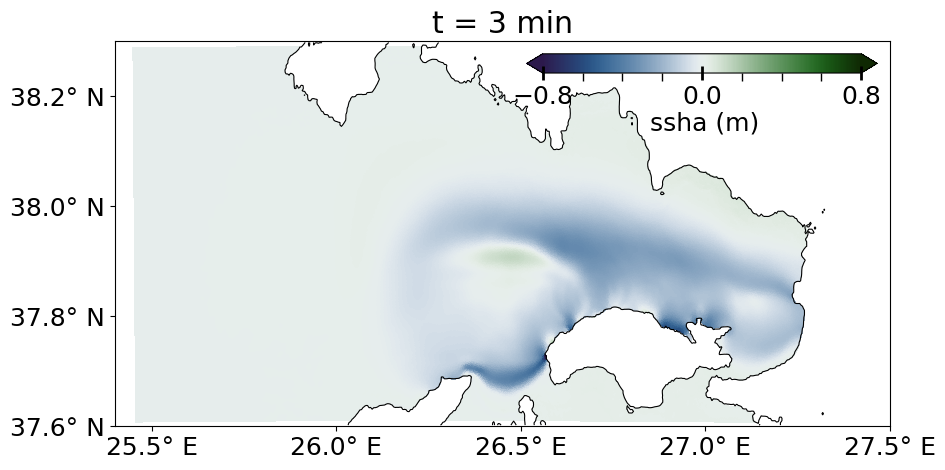

In [31]:
# Kinematic A
model = "Ryo_v3_WL"
xdmfFilename = "/Users/fkutschera/Documents/Data/Samos/Samos_extracted_surface/{}_resampled-surface.xdmf".format(model)
fig = plt.figure()
fig.set_size_inches(10, 5)
ax1 = plt.gca()
time = 1 # 0=0s, 1=180s, 2=360s
plot_ssha(xdmfFilename,time)
fig.savefig("Samos/ssha_fully_{}_{}s.png".format(model, time*180), dpi=300)

Number of time steps in total: 3
(3712776,)
-1.9914165 0.22574154


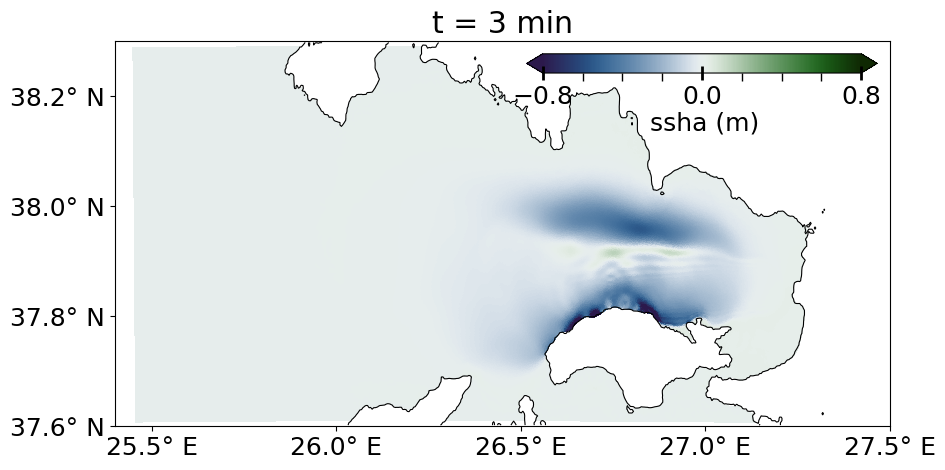

In [32]:
# Kinematic B
model = "Fra_v4_WL"
xdmfFilename = "/Users/fkutschera/Documents/Data/Samos/Samos_extracted_surface/{}_resampled-surface.xdmf".format(model)
fig = plt.figure()
fig.set_size_inches(10, 5)
ax1 = plt.gca()
time = 1 # 0=0s, 1=180s, 2=360s
plot_ssha(xdmfFilename,time)
fig.savefig("Samos/ssha_fully_{}_{}s.png".format(model, time*180), dpi=300)

Number of time steps in total: 3
(3712776,)
-2.3170414 0.83814293


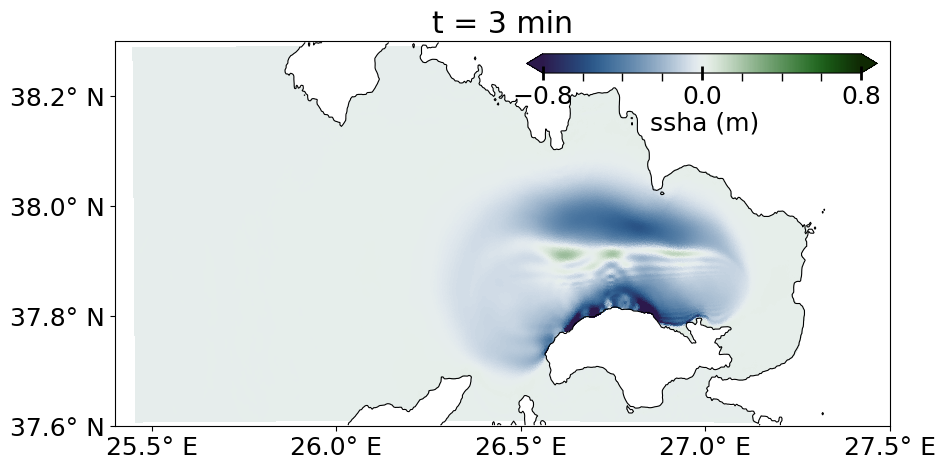

In [33]:
# Dynamic C
model = "Fra_C_WL"
xdmfFilename = "/Users/fkutschera/Documents/Data/Samos/Samos_extracted_surface/{}_resampled-surface.xdmf".format(model)
fig = plt.figure()
fig.set_size_inches(10, 5)
ax1 = plt.gca()
time = 1 # 0=0s, 1=180s, 2=360s
plot_ssha(xdmfFilename,time)
fig.savefig("Samos/ssha_fully_{}_{}s.png".format(model, time*180), dpi=300)

Number of time steps in total: 3
(3712776,)
-2.2987726 0.86999243


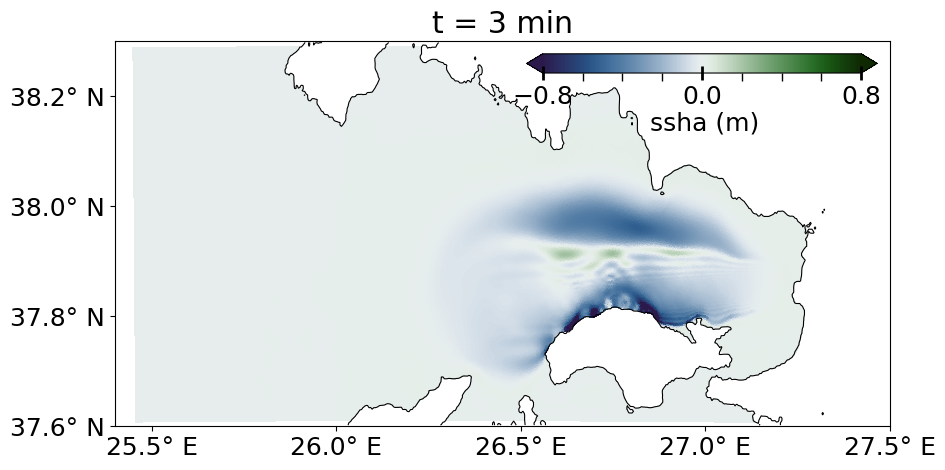

In [34]:
# Dynamic D
model = "Fra_D_WL"
xdmfFilename = "/Users/fkutschera/Documents/Data/Samos/Samos_extracted_surface/{}_resampled-surface.xdmf".format(model)
fig = plt.figure()
fig.set_size_inches(10, 5)
ax1 = plt.gca()
time = 1 # 0=0s, 1=180s, 2=360s
plot_ssha(xdmfFilename,time)
fig.savefig("Samos/ssha_fully_{}_{}s.png".format(model, time*180), dpi=300)

## Difference between Fra models

In [58]:
def plot_ssha_diff(xdmfFilename1,xdmfFilename2,timestep,model_differences):
    # Should work for all "Fra" models
    x1, x2, y1, y2 = 25.4, 27.5, 37.6, 38.3 #Samos
    m = Basemap(epsg=4326, resolution="c", llcrnrlon=x1, urcrnrlon=x2, llcrnrlat=y1, urcrnrlat=y2)#4326
    bathy = "/Users/fkutschera/Documents/Data/Samos/gebco_2022_n40.0_s36.0_w23.0_e29.0.nc"
    fh = Dataset(bathy, mode="r")
    y = fh.variables["lat"][:]
    x = fh.variables["lon"][:]
    z = fh.variables["elevation"][:, :]
    fh.close()
    idx = np.where((x > x1) & (x < x2))[0]
    idy = np.where((y > y1) & (y < y2))[0]
    x = x[idx]
    y = y[idy]
    z = z[idy, :]
    z = z[:, idx]
    lon, lat = np.meshgrid(x, y)
    X, Y = m(lon, lat)
    # Coast line
    plt.contour(X, Y, z, levels=[0], colors="k", linewidths=0.8)

    # File 1
    sx = seissolxdmf.seissolxdmf(xdmfFilename1) # initiate class
    ndt = sx.ReadNdt()
    print("Number of time steps in total: {}".format(ndt))
    xyz = sx.ReadGeometry() # load geometry array as a numpy array of shape
    connect = sx.ReadConnect() # load connectivity array as a numpy array of shape
    U1 = sx.ReadData("u3", timestep) 
    print(U1.shape)
    XYZcenters0 = (xyz[connect[:, 0], :] + xyz[connect[:, 1], :] + xyz[connect[:, 2], :]) / 3.0
    Zcenters0 = abs(XYZcenters0[:, 2])
    U1 = U1[Zcenters0 < 0.001]
    print(min(U1), max(U1))
    connect = connect[Zcenters0 < 0.001]

    # File 2
    sx = seissolxdmf.seissolxdmf(xdmfFilename2) # initiate class
    ndt = sx.ReadNdt()
    print("Number of time steps in total: {}".format(ndt))
    xyz = sx.ReadGeometry() # load geometry array as a numpy array of shape
    connect = sx.ReadConnect() # load connectivity array as a numpy array of shape
    U2 = sx.ReadData("u3", timestep) 
    print(U2.shape)
    XYZcenters0 = (xyz[connect[:, 0], :] + xyz[connect[:, 1], :] + xyz[connect[:, 2], :]) / 3.0
    Zcenters0 = abs(XYZcenters0[:, 2])
    U2 = U2[Zcenters0 < 0.001]
    print(min(U2), max(U2))
    connect = connect[Zcenters0 < 0.001]

    U = U2 - U1
    print(min(U), max(U))
    
    lon, lat = transformer.transform(xyz[:,0], xyz[:,1])
    x, y = m(lon,lat)
    plt.tripcolor(x, y, connect, facecolors=U, cmap=cm.cork, rasterized=True)
    plt.xlim(x1,x2)
    x_ticks = np.arange(25.5,28.0, step=0.5)
    sub_x = np.repeat("° E", len(x_ticks))
    plt.xticks(ticks=x_ticks, labels = np.char.add(x_ticks.astype(str), sub_x))
    plt.ylim(y1,y2)
    y_ticks = np.arange(37.6, 38.2, step=0.2)
    sub_y = np.repeat("° N", len(y_ticks))
    plt.yticks(ticks=y_ticks, labels = np.char.add(np.round(y_ticks, 1).astype(str), sub_y))
    plt.title("t = {} min".format(int(timestep*3)))
    plt.clim(-0.8, 0.8)
    
    plt.text(25.6, 38.25, "{}".format(model_differences), horizontalalignment='center', verticalalignment='center',
             fontsize=20, rotation="horizontal")
    plt.text(27.0, 38.15, "ssha (m)", horizontalalignment='center', verticalalignment='center',
             fontsize=ps, rotation="horizontal")
    cbaxes = inset_axes(ax1, width="45.2%", height="5%", loc="upper right")
    cbar = plt.colorbar(orientation="horizontal", cax=cbaxes, ticks=[-0.8,0.0,0.8], extend="both")
    cbar.ax.tick_params(which="major", labelsize=ps, length=10, width=2, direction="inout")
    cbar.ax.tick_params(which="minor", length=6, width=1.0)
    cbar.ax.minorticks_on()

In [55]:
def plot_ssha_diff(xdmfFilename1,xdmfFilename2,timestep,model_differences):
    # Should work for all "Fra" models
    x1, x2, y1, y2 = 25.4, 27.5, 37.6, 38.3 #Samos
    m = Basemap(epsg=4326, resolution="c", llcrnrlon=x1, urcrnrlon=x2, llcrnrlat=y1, urcrnrlat=y2)#4326
    bathy = "/Users/fkutschera/Documents/Data/Samos/gebco_2022_n40.0_s36.0_w23.0_e29.0.nc"
    fh = Dataset(bathy, mode="r")
    y = fh.variables["lat"][:]
    x = fh.variables["lon"][:]
    z = fh.variables["elevation"][:, :]
    fh.close()
    idx = np.where((x > x1) & (x < x2))[0]
    idy = np.where((y > y1) & (y < y2))[0]
    x = x[idx]
    y = y[idy]
    z = z[idy, :]
    z = z[:, idx]
    lon, lat = np.meshgrid(x, y)
    X, Y = m(lon, lat)
    # Coast line
    plt.contour(X, Y, z, levels=[0], colors="k", linewidths=0.8)

    # File 1
    sx = seissolxdmf.seissolxdmf(xdmfFilename1) # initiate class
    ndt = sx.ReadNdt()
    print("Number of time steps in total: {}".format(ndt))
    xyz = sx.ReadGeometry() # load geometry array as a numpy array of shape
    connect = sx.ReadConnect() # load connectivity array as a numpy array of shape
    U = sx.ReadData("u3", timestep) 
    print(U.shape)

    # File 2
    sx = seissolxdmf.seissolxdmf(xdmfFilename2) # initiate class
    ndt = sx.ReadNdt()
    print("Number of time steps in total: {}".format(ndt))
    xyz = sx.ReadGeometry() # load geometry array as a numpy array of shape
    connect = sx.ReadConnect() # load connectivity array as a numpy array of shape
    U = sx.ReadData("u3", timestep) - U # Take difference
    print(U.shape)
    XYZcenters0 = (xyz[connect[:, 0], :] + xyz[connect[:, 1], :] + xyz[connect[:, 2], :]) / 3.0
    Zcenters0 = abs(XYZcenters0[:, 2])
    U = U[Zcenters0 < 0.001]
    print(min(U), max(U))
    connect = connect[Zcenters0 < 0.001]
    
    lon, lat = transformer.transform(xyz[:,0], xyz[:,1])
    x, y = m(lon,lat)
    plt.tripcolor(x, y, connect, facecolors=U, cmap=cm.cork, rasterized=True)
    plt.xlim(x1,x2)
    x_ticks = np.arange(25.5,28.0, step=0.5)
    sub_x = np.repeat("° E", len(x_ticks))
    plt.xticks(ticks=x_ticks, labels = np.char.add(x_ticks.astype(str), sub_x))
    plt.ylim(y1,y2)
    y_ticks = np.arange(37.6, 38.2, step=0.2)
    sub_y = np.repeat("° N", len(y_ticks))
    plt.yticks(ticks=y_ticks, labels = np.char.add(np.round(y_ticks, 1).astype(str), sub_y))
    plt.title("t = {} min".format(int(timestep*3)))
    plt.clim(-0.1, 0.1)
    
    plt.text(25.6, 38.25, "{}".format(model_differences), horizontalalignment='center', verticalalignment='center',
             fontsize=20, rotation="horizontal")
    plt.text(27.0, 38.15, "ssha (m)", horizontalalignment='center', verticalalignment='center',
             fontsize=ps, rotation="horizontal")
    cbaxes = inset_axes(ax1, width="45.2%", height="5%", loc="upper right")
    cbar = plt.colorbar(orientation="horizontal", cax=cbaxes, ticks=[-0.8,0.0,0.8], extend="both")
    cbar.ax.tick_params(which="major", labelsize=ps, length=10, width=2, direction="inout")
    cbar.ax.tick_params(which="minor", length=6, width=1.0)
    cbar.ax.minorticks_on()

In [56]:
# "Fra" models
modelB = "Fra_v4_WL"
xdmfFilenameB = "/Users/fkutschera/Documents/Data/Samos/Samos_extracted_surface/{}_resampled-surface.xdmf".format(modelB)
modelC = "Fra_C_WL"
xdmfFilenameC = "/Users/fkutschera/Documents/Data/Samos/Samos_extracted_surface/{}_resampled-surface.xdmf".format(modelC)
modelD = "Fra_D_WL"
xdmfFilenameD = "/Users/fkutschera/Documents/Data/Samos/Samos_extracted_surface/{}_resampled-surface.xdmf".format(modelD)

Number of time steps in total: 3
(10912536,)
-2.3170414 0.83814293
Number of time steps in total: 3
(10912536,)
-2.2987726 0.86999243
-2.3164973 2.3285272


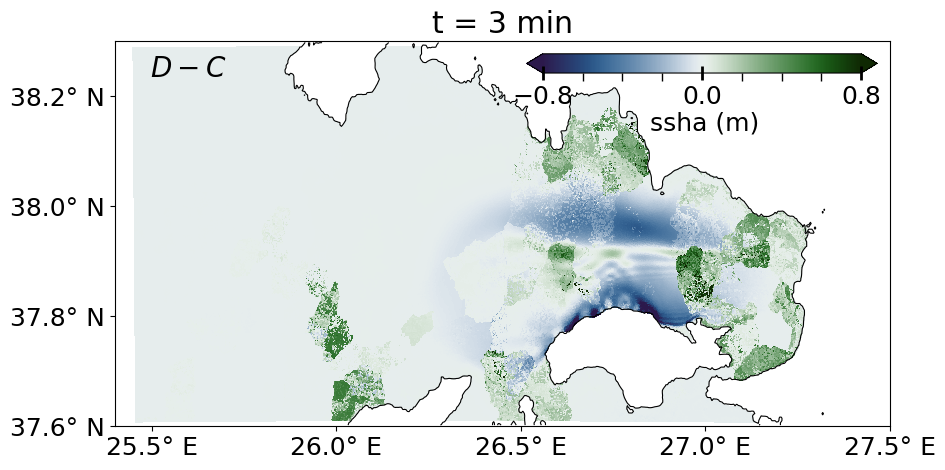

In [60]:
fig = plt.figure()
fig.set_size_inches(10, 5)
ax1 = plt.gca()
time = 1 # 0=0s, 1=180s, 2=360s
plot_ssha_diff(xdmfFilenameC,xdmfFilenameD,time,r"$D-C$")
#fig.savefig("Samos/ssha_fully_{}_{}s.png".format(model, time*180), dpi=300)

Number of time steps in total: 3
(10912536,)
-1.9914165 0.22574154
Number of time steps in total: 3
(10912536,)
-2.3170414 0.83814293
-2.3197281 1.9966563


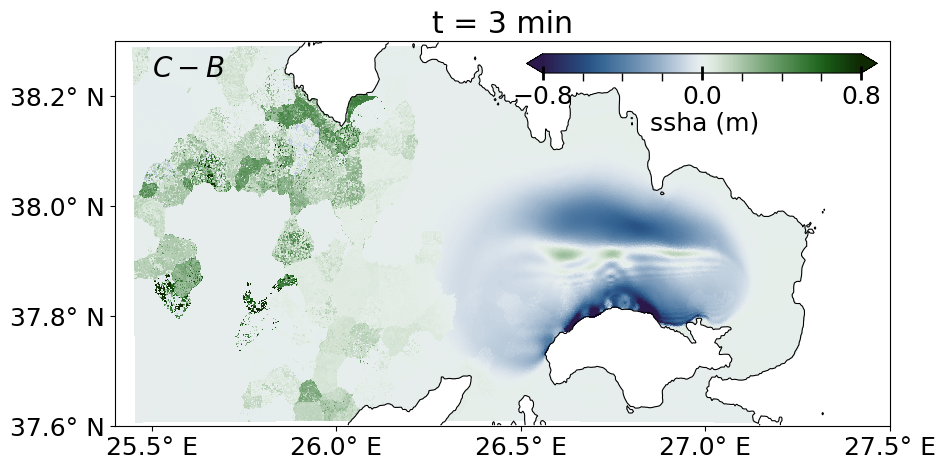

In [59]:
fig = plt.figure()
fig.set_size_inches(10, 5)
ax1 = plt.gca()
time = 1 # 0=0s, 1=180s, 2=360s
plot_ssha_diff(xdmfFilenameB,xdmfFilenameC,time,r"$C-B$")
#fig.savefig("Samos/ssha_fully_{}_{}s.png".format(model, time*180), dpi=300)

Number of time steps in total: 3
(10912536,)
Number of time steps in total: 3
(10912536,)
-2.3230157 1.9962765


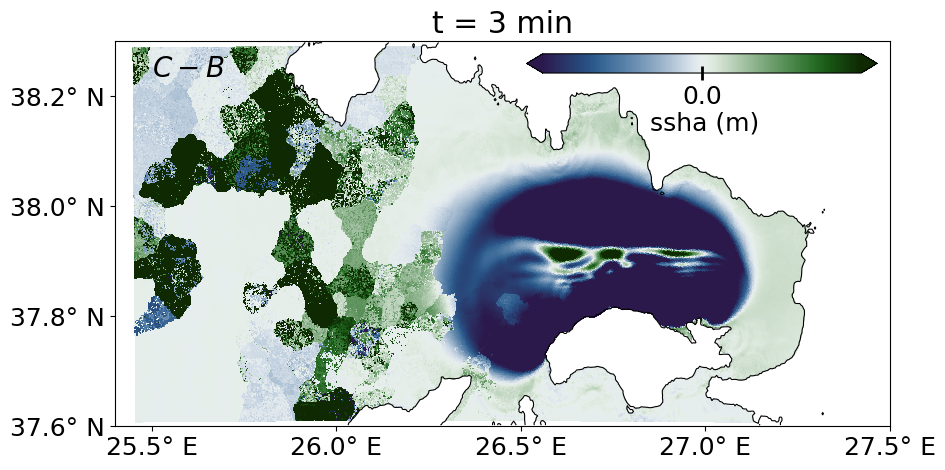

In [57]:
fig = plt.figure()
fig.set_size_inches(10, 5)
ax1 = plt.gca()
time = 1 # 0=0s, 1=180s, 2=360s
plot_ssha_diff(xdmfFilenameB,xdmfFilenameC,time,r"$C-B$")
#fig.savefig("Samos/ssha_fully_{}_{}s.png".format(model, time*180), dpi=300)